### Classifier using one hundred timesteps 
#### rows 0-99, ~1355.3 years

In [1]:
import numpy as np
import pandas as pd

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

from sklearn.ensemble import GradientBoostingClassifier

In [2]:
planets = pd.read_csv('100ts.csv', skipinitialspace=True)
print(planets.columns)

Index(['run', 'planet', 'initial e', 'final e', 'mean e', 'min e', 'max e',
       'sd e', 'initial pericenter', 'final pericenter', 'mean pericenter',
       'min pericenter', 'max pericenter', 'sd pericenter', 'initial jacobi',
       'final jacobi', 'mean jacobi', 'min jacobi', 'max jacobi', 'sd jacobi',
       'initial mhr1', 'final mhr1', 'mean mhr1', 'min mhr1', 'max mhr1',
       'sd mhr1', 'initial mhr2', 'final mhr2', 'mean mhr2', 'min mhr2',
       'max mhr2', 'sd mhr2', 'initial a1_ratio', 'final a1_ratio',
       'mean a1_ratio', 'min a1_ratio', 'max a1_ratio', 'sd a1_ratio',
       'initial a2_ratio', 'final a2_ratio', 'mean a2_ratio', 'min a2_ratio',
       'max a2_ratio', 'sd a2_ratio', 'initial mass1_ratio',
       'final mass1_ratio', 'mean mass1_ratio', 'min mass1_ratio',
       'max mass1_ratio', 'sd mass1_ratio', 'initial mass2_ratio',
       'final mass2_ratio', 'mean mass2_ratio', 'min mass2_ratio',
       'max mass2_ratio', 'sd mass2_ratio', 'end time', 'fate'],


###### Classifies as type of instability (ejection, remaining, planet-planet collision, central body collision).

> Is currently ~64% accurate

In [ ]:
fates = list(set(planets['fate']))
types = {fates[i] : i for i in range(len(fates))}
int_dict = {i : fates[i] for i in range(len(fates))}
classes = planets['fate'].map(types)

###### Classifies as either stable or unstable.
> Is currently 86% accurate

Second cell is the hard coded version

In [ ]:
fates = np.sort(list(set(planets['fate']))) [::-1]

types = {fates[i] : i for i in range(len(fates))}

classes = planets['fate'].map(types)

for i in range(len(classes)):
    if classes[i] == 0:
        pass
    else:
        classes[i] = 1

In [3]:
fates = list(set(planets['fate']))

types = {fates[i] : i for i in range(len(fates))}

classes = []

for i in range(len(planets['fate'])):
    if planets['fate'][i] == "remaining":
        classes += [0]
    else:
        classes += [1]

classes = np.array(classes)

###### Training

In [4]:
features_train, features_test, classes_train, classes_test = train_test_split(planets, classes, test_size=0.3, random_state=7)

ids_train = features_train['planet'].to_numpy()
features_train.drop(['run', 'planet', 'fate', 'end time'], axis=1, inplace=True)

cols = features_train.columns
features_train = features_train.to_numpy()

ids_test = features_test['planet'].to_numpy()
features_test.drop(['run', 'planet', 'fate', 'end time'], axis=1, inplace=True)
features_test = features_test.to_numpy()

/Users/neha/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [5]:
classifier = GradientBoostingClassifier(random_state=7)
classifier.fit(features_train, classes_train)

GradientBoostingClassifier(random_state=7)

In [6]:
classes_predict = classifier.predict( features_test )
print('Classifier is ', accuracy_score(classes_test, classes_predict) * 100, '% accurate on testing set' )

Classifier is  86.0 % accurate on testing set


###### Feature importance

In [7]:
feats=classifier.feature_importances_
inds=np.argsort(feats)[::-1]

for i in range(len(inds)):
    print(cols[inds[i]], feats[inds[i]])

sd e 0.23552025484496517
initial a2_ratio 0.1314441886883301
max e 0.07880884874817069
final mass2_ratio 0.03868169400250812
max mhr2 0.03399145556644954
final e 0.02851215942382414
initial mass1_ratio 0.027143659412347095
max a2_ratio 0.027063489325592723
mean mass2_ratio 0.024838914190298978
initial a1_ratio 0.02473635923146996
initial jacobi 0.022063581778518603
final mass1_ratio 0.021396327120189094
min mass2_ratio 0.02128926601975438
min e 0.01551407307843121
min mhr1 0.015409070318247137
min a2_ratio 0.014897715482475532
sd a1_ratio 0.014414929024962693
initial mhr2 0.01427753273411566
sd pericenter 0.013422590180876312
max mhr1 0.01260965886909226
max jacobi 0.012095548982475262
initial e 0.011906363249551485
min mass1_ratio 0.011701320578785389
initial mass2_ratio 0.010341877712977352
max a1_ratio 0.01022673181573752
max mass1_ratio 0.010049638786624345
initial mhr1 0.009171663325687938
mean mhr2 0.008962064398056751
final jacobi 0.007508806678669984
max mass2_ratio 0.007312944

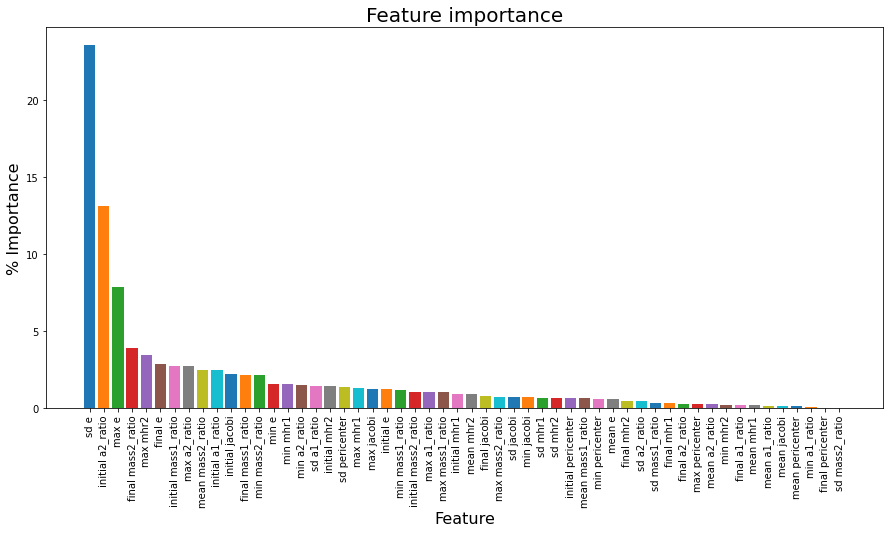

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import pylab


f=plt.figure(figsize=(15,7))

for i in range(len(inds)):
    plt.bar(cols[inds[i]], feats[inds[i]] * 100)
    

 
plt.ylabel('% Importance', size=16)
plt.xlabel('Feature', size=16)
plt.title('Feature importance', size=20)
plt.xticks(rotation = 90)
plt.show()

Text(0.5, 1.0, 'sd e vs initial a2')

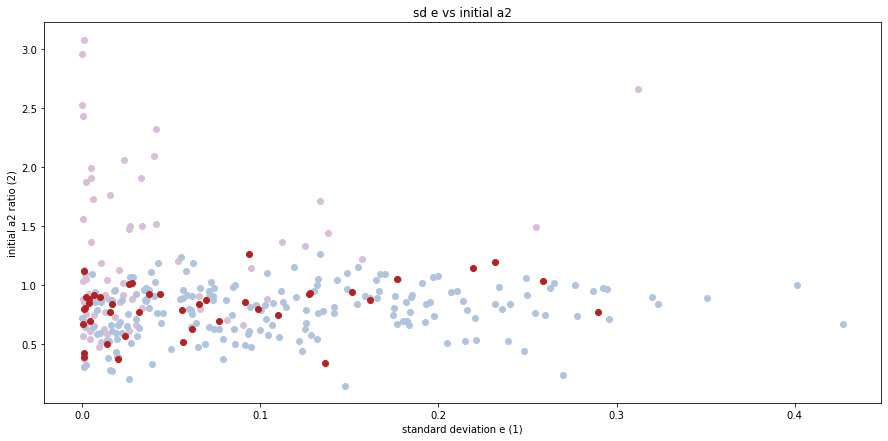

In [12]:
stable_x = []
unstable_x = []
misclassified_x = []
stable_y = []
unstable_y = []
misclassified_y = []
    
    
f=plt.figure(figsize=(15,7))

for i in range(len(features_test)):
    if (classes_test[i] == 0 and classes_predict[i] == 0):
        stable_x.append(features_test[i][5])
        stable_y.append(features_test[i][36])
    elif (classes_test[i] == 1 and classes_predict[i] == 1):
        unstable_x.append(features_test[i][5])
        unstable_y.append(features_test[i][36])
    else:
        misclassified_x.append(features_test[i][5])
        misclassified_y.append(features_test[i][36])

        
plt.scatter(stable_x, stable_y, color = 'thistle')
plt.scatter(misclassified_x, misclassified_y, color = 'firebrick', zorder = 2)
plt.scatter(unstable_x, unstable_y, color = 'lightsteelblue')

        
plt.ylabel('initial a2 ratio (2)')
plt.xlabel('standard deviation e (1)')
plt.title('sd e vs initial a2')